In [128]:
from gensim.models import KeyedVectors
import sys
import os
from matplotlib import pyplot as plt
# sys.path.append("/home/zhanibek/Desktop/Fall '19/Senior Project/news2image")
# sys.path.append("/home/zhanibek/Desktop/Fall '19/Senior Project/news2image/src")
from IPython.display import Image as ImageOpener, display
from random import randint

from src.config import Word2VecConfig, ImageConfig
from src.common.space import Space
from src.recommender import Recommender
from src.image.encoder import ImageEncoder
from src.text.encoder import TextEncoder
from src.text.summarizer import NewsSummarizer

In [29]:
# t_keyed_vectors = KeyedVectors.load_word2vec_format(fname=Word2VecConfig.get_word_vectors_filename(),
#                                                     limit=500000,
#                                                     binary=True)
t_space = Space(t_keyed_vectors)
image_encoder = ImageEncoder(space=t_space)
text_encoder = TextEncoder(space=t_space)

In [5]:
t_recommender = Recommender(space=t_space)
t_recommender.set_image_subspaces(path=ImageConfig.get_image_subspaces_folder())

2020-02-27 00:02:05,823 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'man': 4, 'police': 3, 'knife': 3, 'cctv': 2, 'manchester': 2, 'wave': 2, 'shock': 1, 'footage': 1, 'release': 1, 'show': 1, 'moment': 1, 'wield': 1, 'large': 1, 'bladed': 1, 'tackle': 1, 'grind': 1, 'arm': 1, 'officer': 1, 'at': 1, 'tuesday': 1, 'operators': 1, 'spot': 1, 'butcher': 1, 'piccadilly': 1, 'garden': 1, 'area': 1, 'inform': 1, 'the': 1, 'struggle': 1, 'stand': 1, 'interact': 1, 'terrify': 1, 'members': 1, 'public': 1, 'continue': 1, 'a': 1, 'year': 1, 'arrest': 1, 'suspicion': 1, 'affray': 1, 'remain': 1, 'custody': 1, 'question': 1})
summarizer. words count for keywords:  Counter({'man': 4, 'knife': 3, 'police': 3, 'manchester': 2, 'wave': 2, 'cctv': 2, 'operators': 1, 'garden': 1, 'inform': 1, 'spot': 1, 'tuesday': 1, 'area': 1})
Encoder. Keywords: Counter({'man': 4, 'knife': 3, 'police': 3, 'manchester': 2, 'wave': 2})


In [129]:
def get_random_text() -> str:
   # Get a random text
    texts_folder = "/home/zhanibek/Desktop/Fall '19/Senior Project/news2image/data/texts"
    category = 'news'
    txts = os.listdir(os.path.join(texts_folder, category))
    r = randint(0, len(txts))
    with open(os.path.join(texts_folder, category, txts[r]), 'r') as f:
        t_text = f.read()
    return t_text 

In [123]:
preds: list = t_recommender.predict(text=t_text)

2020-02-27 00:45:20,107 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'statue': 5, 'communism': 2, 'china': 2, 'town': 2, 'two': 2, 'in': 1, 'karl': 1, 'marx': 1, 'hometown': 1, 'trier': 1, 'germany': 1, 'people': 1, 'unveil': 1, 'huge': 1, 'founder': 1, 'gift': 1, 'sculptor': 1, 'bridge': 1, 'friendship': 1, 'countries': 1, 'protesters': 1, 'supporters': 1, 'response': 1, 'east': 1, 'germans': 1, 'live': 1, 'years': 1, 'world': 1, 'war': 1, 'end': 1, 'critics': 1, 'poor': 1, 'human': 1, 'right': 1, 'record': 1})
summarizer. words count for keywords:  Counter({'statue': 5, 'china': 2, 'town': 2, 'two': 2, 'sculptor': 1, 'countries': 1, 'friendship': 1, 'gift': 1, 'bridge': 1})
Encoder. Keywords: Counter({'statue': 5, 'china': 2, 'town': 2, 'two': 2, 'sculptor': 1})


In [124]:
images_folder = ImageConfig.get_images_folder()
image_id = preds[0][0]
image_filepath = f'{images_folder}/{image_id}.jpg'
# display(ImageOpener(image_filepath))

In [125]:
t_captions: list = image_encoder._get_captions(image_filename=image_filepath)
print(t_captions)
t_keywords = image_encoder._get_keywords(captions=t_captions)
print(t_keywords)

['a close up of a flower in a vase', 'a close up of a flower in a vase', 'a close up of a flower in a vase', 'a close up of a flower in a vase', 'a close up of a flower in a vase']
Counter({'vase': 1})


In [107]:
ss = image_encoder.create_subspace(image_filepath)
tt = text_encoder.create_subspace(text=t_text)

summarizer. words count for all tokens:  Counter({'plastic': 4, 'bag': 4, 'ban': 3, 'state': 2, 'last': 1, 'friday': 1, 'new': 1, 'york': 1, 'lawmakers': 1, 'agree': 1, 'impose': 1, 'kinds': 1, 'retailers': 1, 'the': 1, 'effect': 1, 'march': 1, 'year': 1, 'however': 1, 'food': 1, 'newspapers': 1, 'clothe': 1, 'big': 1, 'trash': 1, 'right': 1, 'california': 1, 'hawaii': 1, 'american': 1})
summarizer. words count for keywords:  Counter({'bag': 4, 'plastic': 4, 'ban': 3, 'state': 2, 'york': 1, 'retailers': 1, 'friday': 1, 'lawmakers': 1, 'impose': 1, 'kinds': 1, 'agree': 1})
Encoder. Keywords: Counter({'bag': 4, 'plastic': 4, 'ban': 3, 'state': 2, 'york': 1})


In [108]:
t_space.subspaces_similarity(ss, tt)

0.16024482

In [161]:
t_text = get_random_text()
sims = t_recommender.compute_similarities(t_text)

2020-02-27 01:38:29,984 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'earthquake': 3, 'city': 3, 'people': 2, 'include': 2, 'children': 2, 'mexico': 2, 'at': 1, 'confirm': 1, 'dead': 1, 'week': 1, 'the': 1, 'magnitude': 1, 'quake': 1, 'incidentally': 1, 'strike': 1, 'drill': 1, 'years': 1, 'kill': 1, 'thousands': 1, 'many': 1, 'rescue': 1, 'operations': 1, 'day': 1, 'night': 1, 'one': 1, 'pull': 1, 'school': 1, 'rubble': 1})
summarizer. words count for keywords:  Counter({'city': 3, 'earthquake': 3, 'people': 2, 'children': 2, 'mexico': 2, 'include': 2, 'confirm': 1, 'week': 1, 'dead': 1, 'follow': 0})
Encoder. Keywords: Counter({'city': 3, 'earthquake': 3, 'people': 2, 'children': 2, 'mexico': 2})


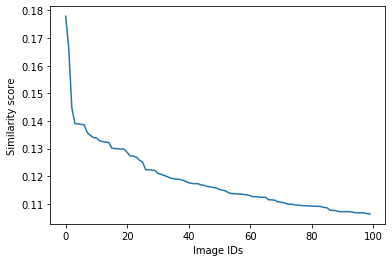

In [162]:
sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
sims_sorted_scores = [sim[1] for sim in sims_sorted]
plt.plot(sims_sorted_scores[:100])
plt.ylabel('Similarity score')
plt.xlabel('Image IDs')
# plt.show()
plt.savefig(f'similarity_scores/{category}_{r}.png')

In [165]:
def save_plots():
    t_text = get_random_text()
    sims = t_recommender.compute_similarities(t_text)
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
    sims_sorted_scores = [sim[1] for sim in sims_sorted]
    plt.plot(range(1, 51), sims_sorted_scores[:50])
#     plt.xticks(range(1, 51, ))
    plt.ylabel('Similarity score')
    plt.xlabel('Image IDs')
    # plt.show()
    plt.savefig(f'similarity_scores/top50.svg', format='svg', dpi=1200)

2020-02-27 01:40:23,434 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'force': 3, 'indian': 2, 'kashmir': 2, 'rebel': 2, 'battle': 2, 'the': 2, 'two': 2, 'government': 1, 'raid': 1, 'home': 1, 'control': 1, 'tip': 1, 'hide': 1, 'there': 1, 'gun': 1, 'security': 1, 'six': 1, 'people': 1, 'die': 1, 'injure': 1, 'deadly': 1, 'spark': 1, 'protest': 1, 'clash': 1, 'protesters': 1, 'throw': 1, 'rock': 1, 'fire': 1, 'shotgun': 1, 'pellets': 1, 'tear': 1, 'gas': 1, 'region': 1, 'divide': 1, 'three': 1, 'countries': 1, 'china': 1, 'pakistan': 1, 'india': 1, 'fight': 1, 'war': 1, 'own': 1})
summarizer. words count for keywords:  Counter({'force': 3, 'battle': 2, 'rebel': 2, 'gun': 1, 'die': 1, 'injure': 1, 'security': 1, 'six': 1, 'people': 1})
Encoder. Keywords: Counter({'force': 3, 'battle': 2, 'rebel': 2, 'gun': 1, 'die': 1})


2020-02-27 01:40:30,182 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'wipe': 9, 'wet': 7, 'blockages': 3, 'flushable': 2, 'water': 2, 'company': 2, 'label': 2, 'commonplace': 1, 'home': 1, 'make': 1, 'sink': 1, 'end': 1, 'loo': 1, 'problem': 1, 'when': 1, 'sewer': 1, 'combine': 1, 'fat': 1, 'oil': 1, 'grease': 1, 'form': 1, 'hard': 1, 'fatbergs': 1, 'in': 1, 'britain': 1, 'items': 1, 'and': 1, 'cost': 1, 'million': 1, 'pound': 1, 'year': 1, 'share': 1, 'british': 1, 'taxpayers': 1, 'remove': 1, 'some': 1, 'english': 1, 'charities': 1, 'call': 1, 'flush': 1, 'if': 1, 'put': 1, 'bin': 1})
summarizer. words count for keywords:  Counter({'wipe': 9, 'wet': 7, 'blockages': 3, 'flushable': 2, 'items': 1, 'britain': 1})
Encoder. Keywords: Counter({'wipe': 9, 'wet': 7, 'blockages': 3, 'flushable': 2, 'items': 1})


2020-02-27 01:40:36,484 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'street': 2, 'madrid': 2, 'die': 2, 'police': 2, 'incident': 2, 'people': 2, 'an': 1, 'african': 1, 'vendor': 1, 'spain': 1, 'evade': 1, 'crack': 1, 'illegal': 1, 'sales': 1, 'mayor': 1, 'regret': 1, 'year': 1, 'death': 1, 'call': 1, 'investigation': 1, 'report': 1, 'man': 1, 'cardiac': 1, 'arrest': 1, 'collapse': 1, 'policemen': 1, 'chase': 1, 'motorcycle': 1, 'follow': 1, 'clash': 1, 'break': 1, 'city': 1, 'protesters': 1, 'hurl': 1, 'stone': 1, 'start': 1, 'fire': 1, 'firefighters': 1, 'spend': 1, 'night': 1, 'put': 1})
summarizer. words count for keywords:  Counter({'die': 2, 'street': 2, 'police': 2, 'madrid': 2, 'crack': 1, 'sales': 1, 'african': 1, 'evade': 1, 'spain': 1, 'vendor': 1, 'illegal': 1})
Encoder. Keywords: Counter({'die': 2, 'street': 2, 'police': 2, 'madrid': 2, 'crack': 1})


2020-02-27 01:40:43,510 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'rescue': 3, 'on': 2, 'june': 1, 'twelve': 1, 'boys': 1, 'football': 1, 'coach': 1, 'trap': 1, 'cave': 1, 'thailand': 1, 'their': 1, 'day': 1, 'ordeal': 1, 'efforts': 1, 'closely': 1, 'watch': 1, 'world': 1, 'sunday': 1, 'monday': 1, 'eight': 1, 'people': 1, 'tuesday': 1, 'five': 1, 'all': 1, 'hospital': 1, 'week': 1, 'families': 1, 'glass': 1})
summarizer. words count for keywords:  Counter({'football': 1, 'june': 1, 'trap': 1, 'coach': 1, 'cave': 1, 'boys': 1, 'thailand': 1, 'twelve': 1})
Encoder. Keywords: Counter({'football': 1, 'june': 1, 'trap': 1, 'coach': 1, 'cave': 1})


2020-02-27 01:40:50,426 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'police': 2, 'two': 1, 'people': 1, 'die': 1, 'injure': 1, 'van': 1, 'drive': 1, 'restaurant': 1, 'terrace': 1, 'area': 1, 'münster': 1, 'city': 1, 'western': 1, 'germany': 1, 'afterwards': 1, 'year': 1, 'driver': 1, 'shoot': 1, 'kill': 1, 'the': 1, 'state': 1, 'interior': 1, 'minister': 1, 'lone': 1, 'german': 1, 'suffer': 1, 'mental': 1, 'health': 1, 'problems': 1, 'he': 1, 'refugee': 1, 'search': 1, 'four': 1, 'home': 1, 'attacker': 1, 'clue': 1, 'point': 1, 'extremist': 1, 'political': 1, 'motive': 1})
summarizer. words count for keywords:  Counter({'refugee': 1})
Encoder. Keywords: Counter({'refugee': 1})


2020-02-27 01:40:56,223 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'people': 4, 'firefighters': 2, 'lose': 2, 'they': 2, 'fire': 2, 'warehouse': 2, 'blaze': 2, 'eight': 1, 'russian': 1, 'live': 1, 'save': 1, 'work': 1, 'put': 1, 'huge': 1, 'plastics': 1, 'depot': 1, 'eastern': 1, 'moscow': 1, 'help': 1, 'evacuate': 1, 'workers': 1, 'prevent': 1, 'explosion': 1, 'gas': 1, 'cylinders': 1, 'sadly': 1, 'authorities': 1, 'intense': 1, 'thick': 1, 'smoke': 1, 'overcome': 1, 'rescuers': 1, 'the': 1, 'spread': 1, 'square': 1, 'metres': 1, 'contact': 1, 'men': 1, 'roof': 1, 'collapse': 1, 'hope': 1, 'find': 1, 'alive': 1, 'contain': 1, 'discover': 1, 'body': 1})
summarizer. words count for keywords:  Counter({'people': 4, 'warehouse': 2, 'workers': 1, 'prevent': 1, 'explosion': 1, 'evacuate': 1, 'gas': 1, 'cylinders': 1})
Encoder. Keywords: Counter({'people': 4, 'warehouse': 2, 'workers': 1, 'prevent': 1, 'explosion': 1})


2020-02-27 01:41:02,401 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'gun': 2, 'students': 1, 'unite': 1, 'state': 1, 'streets': 1, 'demand': 1, 'government': 1, 'action': 1, 'violence': 1, 'protest': 1, 'wake': 1, 'month': 1, 'mass': 1, 'shoot': 1, 'florida': 1, 'high': 1, 'school': 1, 'thousands': 1, 'people': 1, 'march': 1, 'white': 1, 'house': 1, 'capitol': 1, 'hill': 1, 'attract': 1, 'support': 1, 'pro': 1, 'control': 1, 'politicians': 1, 'washington': 1})
summarizer. words count for keywords:  Counter({'gun': 2, 'house': 1, 'washington': 1, 'thousands': 1, 'control': 1, 'march': 1, 'capitol': 1, 'hill': 1, 'support': 1, 'pro': 1, 'people': 1, 'white': 1, 'politicians': 1})
Encoder. Keywords: Counter({'gun': 2, 'house': 1, 'washington': 1, 'thousands': 1, 'control': 1})


2020-02-27 01:41:09,645 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'charge': 4, 'electric': 4, 'point': 3, 'london': 2, 'street': 2, 'cars': 2, 'lamp': 2, 'car': 2, 'find': 2, 'park': 2, 'westminster': 2, 'a': 2, 'in': 1, 'company': 1, 'name': 1, 'ubitricity': 1, 'turn': 1, 'lamps': 1, 'put': 1, 'device': 1, 'fit': 1, 'inside': 1, 'exist': 1, 'pole': 1, 'all': 1, 'driver': 1, 'plug': 1, 'the': 1, 'part': 1, 'pilot': 1, 'project': 1, 'man': 1, 'city': 1, 'council': 1, 'residents': 1, 'hop': 1, 'encourage': 1, 'people': 1, 'buy': 1, 'current': 1, 'owner': 1, 'idea': 1, 'make': 1, 'easy': 1})
summarizer. words count for keywords:  Counter({'electric': 4, 'charge': 4, 'point': 3, 'cars': 2, 'westminster': 2, 'find': 2, 'city': 1, 'encourage': 1, 'man': 1, 'council': 1, 'hop': 1, 'people': 1, 'residents': 1, 'buy': 1})
Encoder. Keywords: Counter({'electric': 4, 'charge': 4, 'point': 3, 'cars': 2, 'westminster': 2})


2020-02-27 01:41:16,299 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'sandstorms': 1, 'common': 1, 'egypt': 1, 'late': 1, 'winter': 1, 'early': 1, 'spring': 1, 'extreme': 1, 'one': 1, 'force': 1, 'close': 1, 'highways': 1, 'port': 1, 'alexandria': 1, 'an': 1, 'orange': 1, 'cloud': 1, 'sand': 1, 'plunge': 1, 'cairo': 1, 'darkness': 1, 'wind': 1, 'reach': 1, 'speed': 1, 'kilometres': 1, 'hour': 1})
summarizer. words count for keywords:  Counter({'reach': 1, 'hour': 1, 'cairo': 1, 'darkness': 1, 'orange': 1, 'cloud': 1, 'speed': 1, 'kilometres': 1, 'sand': 1, 'plunge': 1})
Encoder. Keywords: Counter({'reach': 1, 'hour': 1, 'cairo': 1, 'darkness': 1, 'orange': 1})


2020-02-27 01:41:22,820 recommender: INFO (300, 5)


summarizer. words count for all tokens:  Counter({'wind': 2, 'kill': 2, 'people': 2, 'tree': 2, 'netherlands': 2, 'die': 2, 'woman': 2, 'gale': 1, 'force': 1, 'batter': 1, 'europe': 1, 'thursday': 1, 'fall': 1, 'two': 1, 'elderly': 1, 'men': 1, 'three': 1, 'germany': 1, 'one': 1, 'belgium': 1, 'the': 1, 'powerful': 1, 'leave': 1, 'thousand': 1, 'home': 1, 'power': 1, 'east': 1, 'england': 1, 'someone': 1, 'film': 1, 'heart': 1, 'stop': 1, 'moment': 1, 'fell': 1, 'pram': 1})
summarizer. words count for keywords:  Counter({'kill': 2, 'people': 2, 'wind': 2, 'batter': 1, 'thursday': 1, 'gale': 1, 'europe': 1, 'force': 1})
Encoder. Keywords: Counter({'kill': 2, 'people': 2, 'wind': 2, 'batter': 1, 'thursday': 1})


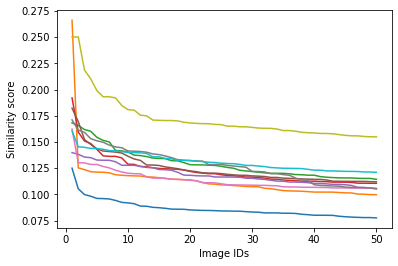

In [166]:
for i in range(10):
    save_plots()